In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.WISDM_19_PHONE)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = True
# force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-11 11:52:57,599 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:52:57,600 - whar-datasets - INFO - Running DownloadingStep
2026-02-11 11:52:57,600 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-11 11:52:57,600 - whar-datasets - INFO - Hash is up to date
2026-02-11 11:52:57,601 - whar-datasets - INFO - Downloading wisdm_19_phone
2026-02-11 11:53:19,054 - whar-datasets - INFO - Extracting wisdm_19_phone
2026-02-11 11:53:20,731 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:53:20,731 - whar-datasets - INFO - Running ParsingStep
2026-02-11 11:53:20,731 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-11 11:53:20,732 - whar-datasets - INFO - Hash is up to date
2026-02-11 11:53:20,732 - whar-datasets - INFO - Checking download
2026-02-11 11:53:20,733 - whar-datasets - INFO - Download exists
2026-02-11 11:53:20,733 - whar-datasets - INFO - Parsing to common format


datasets/wisdm_19_phone/data
Fertig! Shape des finalen DataFrames: (2909149, 9)


Creating sessions: 100%|██████████| 824/824 [00:01<00:00, 487.95it/s]
2026-02-11 11:53:27,680 - whar-datasets - INFO - Saving common format
2026-02-11 11:53:28,313 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:53:28,314 - whar-datasets - INFO - Running WindowingStep
2026-02-11 11:53:28,314 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-11 11:53:28,315 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:53:28,316 - whar-datasets - INFO - Validating common format
2026-02-11 11:53:28,322 - whar-datasets - INFO - Validating sessions (parallelized)


[########################################] | 100% Completed | 2.20 sms


2026-02-11 11:53:30,774 - whar-datasets - INFO - Common format validated.
2026-02-11 11:53:30,775 - whar-datasets - INFO - Compute windowing
2026-02-11 11:53:30,775 - whar-datasets - INFO - Selecting activities
2026-02-11 11:53:30,779 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 18.14 ss


2026-02-11 11:53:49,168 - whar-datasets - INFO - Saving windowing
2026-02-11 11:53:57,198 - whar-datasets - INFO - Loading windowing
2026-02-11 11:53:57,215 - whar-datasets - INFO - activity_ids from 0 to 17
2026-02-11 11:53:57,215 - whar-datasets - INFO - subject_ids from 0 to 50


In [4]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_0 43229 10807 1260
subject_1 43226 10806 1264
subject_2 43492 10873 931
subject_3 43228 10806 1262
subject_4 43229 10807 1260
subject_5 43229 10807 1260
subject_6 43229 10807 1260
subject_7 43282 10820 1194
subject_8 43565 10891 840
subject_9 43292 10822 1182
subject_10 43402 10850 1044
subject_11 43285 10821 1190
subject_12 43229 10807 1260
subject_13 43228 10807 1261
subject_14 43794 10948 554
subject_15 43229 10807 1260
subject_16 43784 10945 567
subject_17 43229 10807 1260
subject_18 43292 10823 1181
subject_19 43227 10806 1263
subject_20 43745 10936 615
subject_21 43229 10807 1260
subject_22 43229 10807 1260
subject_23 43509 10877 910
subject_24 43229 10807 1260
subject_25 43756 10938 602
subject_26 43287 10821 1188
subject_27 44179 11044 73
subject_28 43749 10937 610
subject_29 43285 10821 1190
subject_30 43229 10807 1260
subject_31 43229 10807 1260
subject_32 43229 10807 1260
subject_33 43453 10863 980
subject_34 43229 10807 1260
subject_35 43905 10976 415
subject_36 432

In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-02-11 11:53:57,521 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:53:57,522 - whar-datasets - INFO - Running SamplingStep
2026-02-11 11:53:57,522 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-11 11:53:57,523 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:54:01,501 - whar-datasets - INFO - Computing samples
2026-02-11 11:54:01,501 - whar-datasets - INFO - Getting normalization parameters
2026-02-11 11:54:02,122 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 16.27 s


2026-02-11 11:54:18,656 - whar-datasets - INFO - Saving samples
2026-02-11 11:54:18,967 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

55296


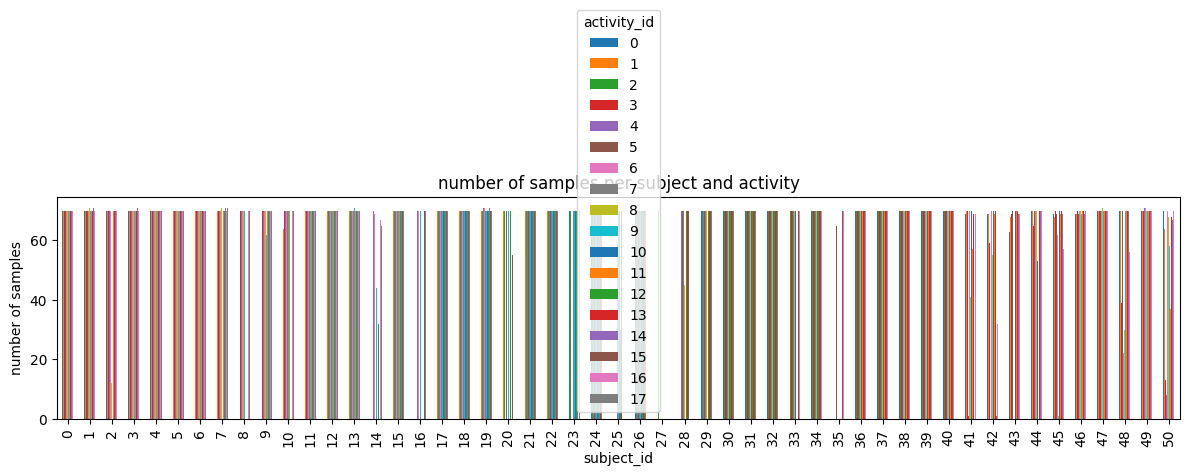

In [9]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 14, Subject: 25')

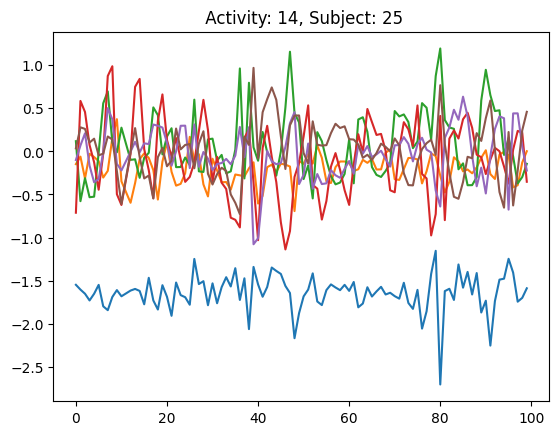

In [33]:
subject_id = None  # 2
activity_id = None  # 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")